# Задача для поступления на каферу ИППИ. 
###  Подготовил Евгений Лагутин, гр. 677
### 23 апреля 2018 г.

## Задача: рассказать про алгоритм кластеризации 
## k-means++ и реализовать его.

## Кластерный анализ

Задача кластеризации состоит в восстановлении функции $f(x):\mathcal{X}\rightarrow \mathcal{Y}$, где $\mathcal{X}\subset \mathbb{R}^d$ - пространство обектов, $\mathcal{Y} = \{y_1,y_2,\dots,y_k\}$ - пространство классов, причём, как правило, заранее кластеры нам не известны. 

Предположения:
+ Нам известно количество кластеров $k$.
+ $\mathcal{X} = \{x_1,\dots,x_n\}$.
+ можем сделать предположение о функции расстояния на $\mathcal{X}$
+ выполнена гипотеза компактности

$\textbf{Гипотеза компактности}$: Схожие объекты находятся в одном классе.

In [5]:
from IPython.display import display, Image

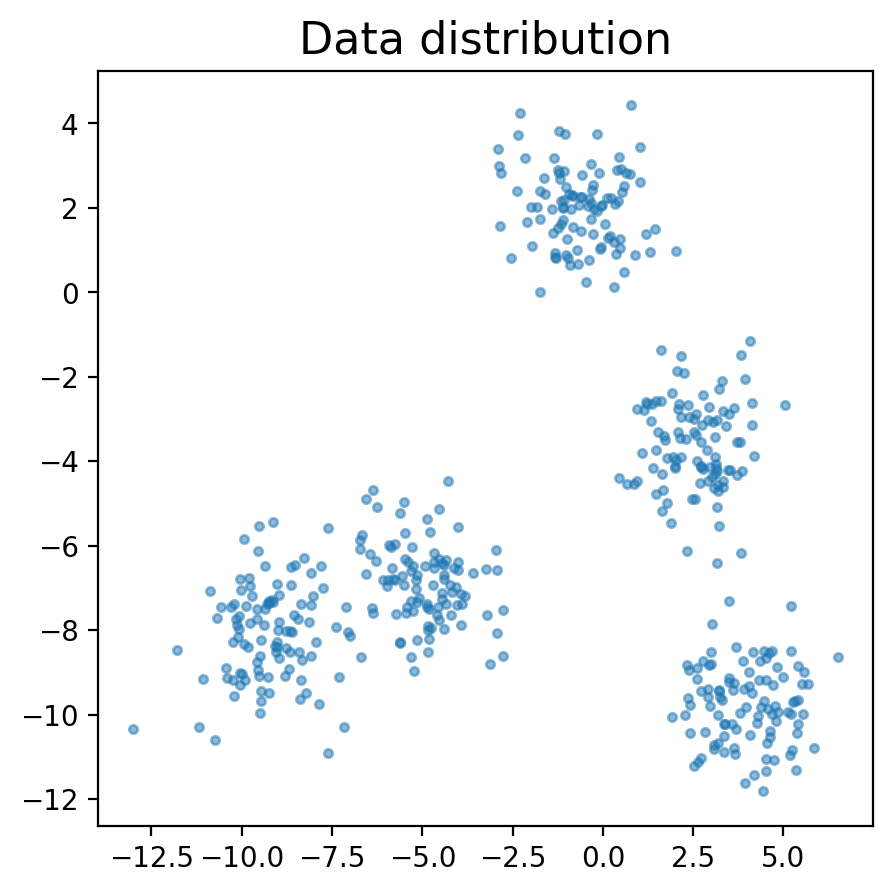

In [76]:
display(Image("clustering1.png", width = 400))

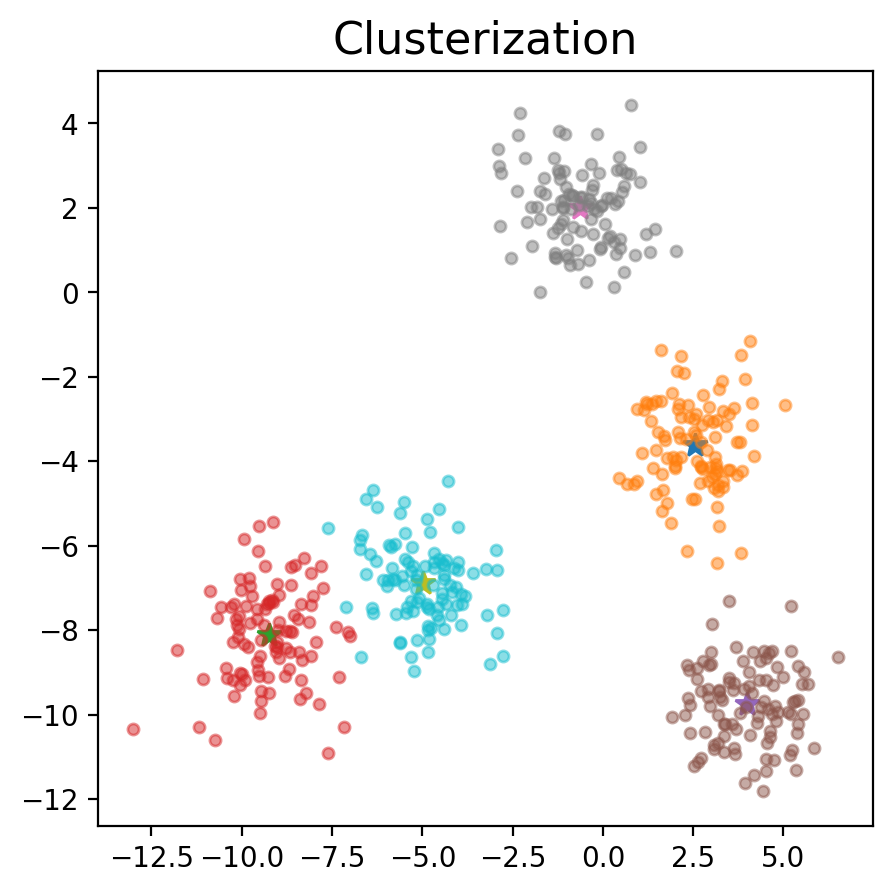

In [77]:
display(Image("clustering2.png", width = 400))

## Метод кластеризации $\texttt{k-means}$
$\texttt{k-means}$ - один из самых популярных алгоритмов кластеризации
Алгоритм k-means позволяет нам минимизировать функцию
$$\phi = \sum \limits _{x \in \mathcal{X}} \min\limits_{c \in \mathcal{C}}||x-c||^2 $$

Вообще говоря, это $\textbf{NP}$-трудная задача даже для $k=2$ кластеров, что можно показать сведением $\textit {densest cut problem}$ к задаче нахождения минимума $\phi$.

Алгоритм выглядит так:

1. Произвольно выбираем $k$ центров $\mathcal{C}=\{c_1\dots,c_k\}\subset \mathcal{X}$.

2. Для каждого $i \in \{1,\dots,k\}$ определяем кластер $C_i$, как множество $x \in \mathcal{C}$ таких, что $||x-c_i||^2 = \min\limits_{c\in \mathcal{C}} ||x-c||^2$

3. Для каждого $i \in \{1,\dots,k\}$ переопределим $c_i = \frac{1}{|C_i|}\sum\limits_{x\in C_i}x$. 

4. Будем повторять шаги 2, 3 пока центры кластеров не перестанут меняться.

Каждый шаг не увеличивает значение $\phi\Rightarrow\phi$ сходится к локальному минимуму.
Так как объектов конечное число, то существует конечное число способов разбить его на кластеры, следовательно, т.к. $\phi$ не возрастает, алгоритм всегда останавливается. 

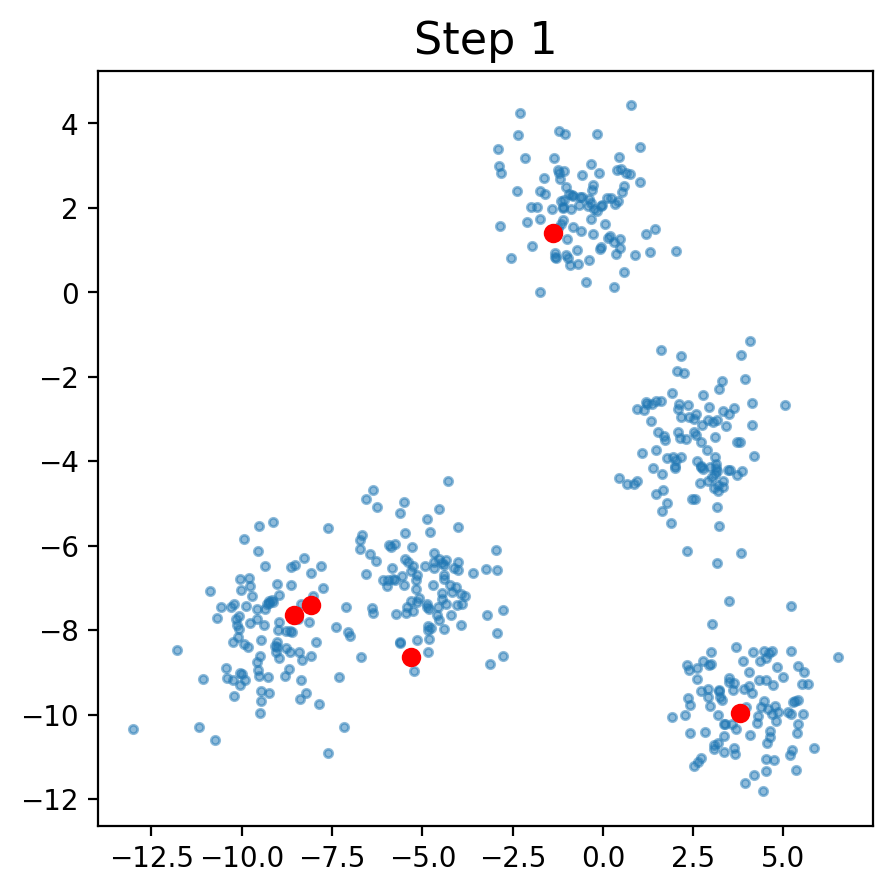

In [78]:
display(Image("step1.png", width = 400))

		Other steps


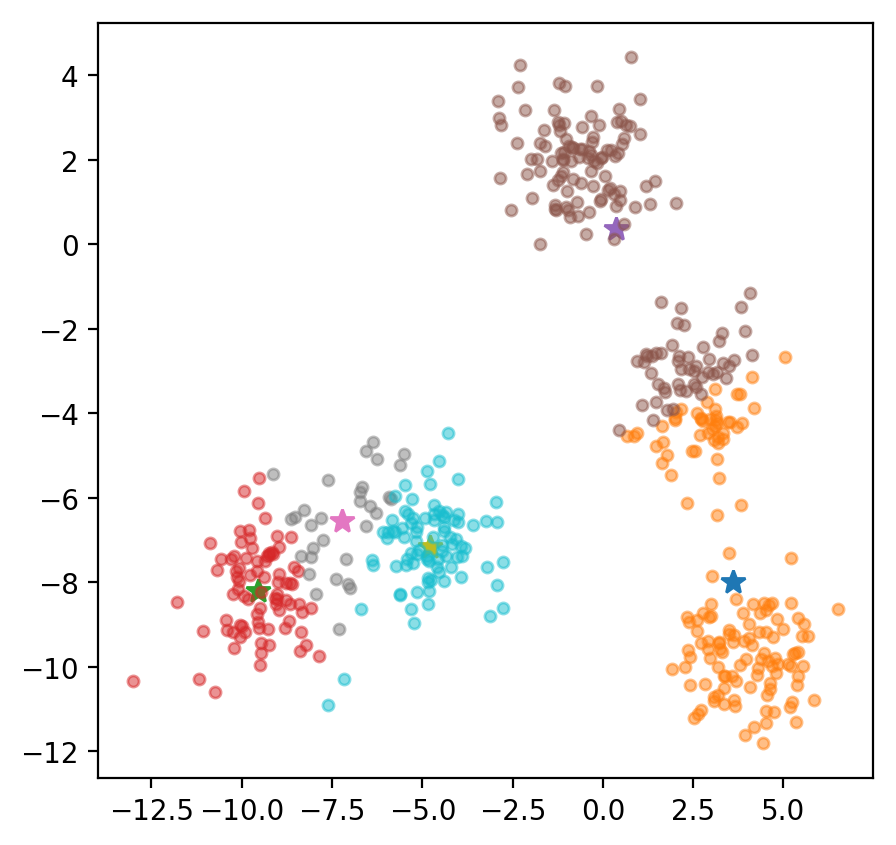

In [79]:
print('\t\tOther steps')
display(Image("km2.png", width = 400))

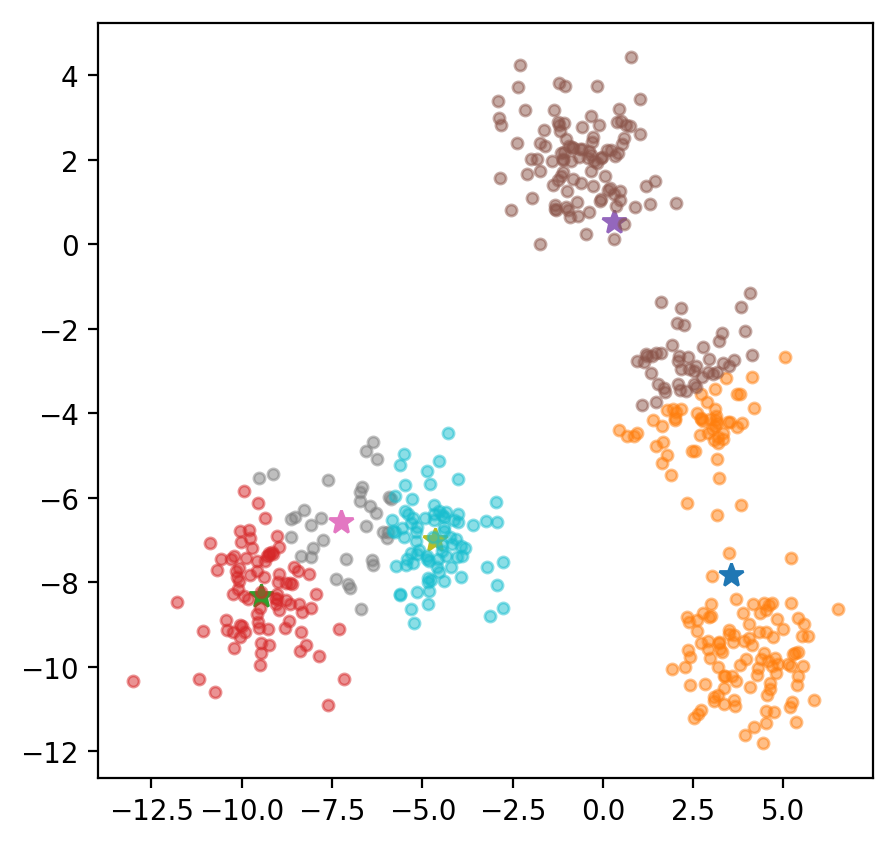

In [81]:
display(Image("km7.png", width = 400))

### Достоинства $\texttt{k-means}$
+ Простота реализации

+ Скорость схождения и выполнения

### Недостатки $\texttt{k-means}$
- Надо знать заранее число кластеров

- Алгоритм недетерминированный - очень чувствителен к начальной инициализации центров

- Алгоритм не гарантирует сходимости к глобальному минимуму

- Зависимость от "формы" кластеров

- Некоректная работа на кластерах, у которых центр не принадлежит области, занимаемой объектами кластера

### Наборы, где плохо работает k-means, т.к. мы отказываемся от начальных знаний о распределениях кластеров
### (контрпример: алгоритм EM)

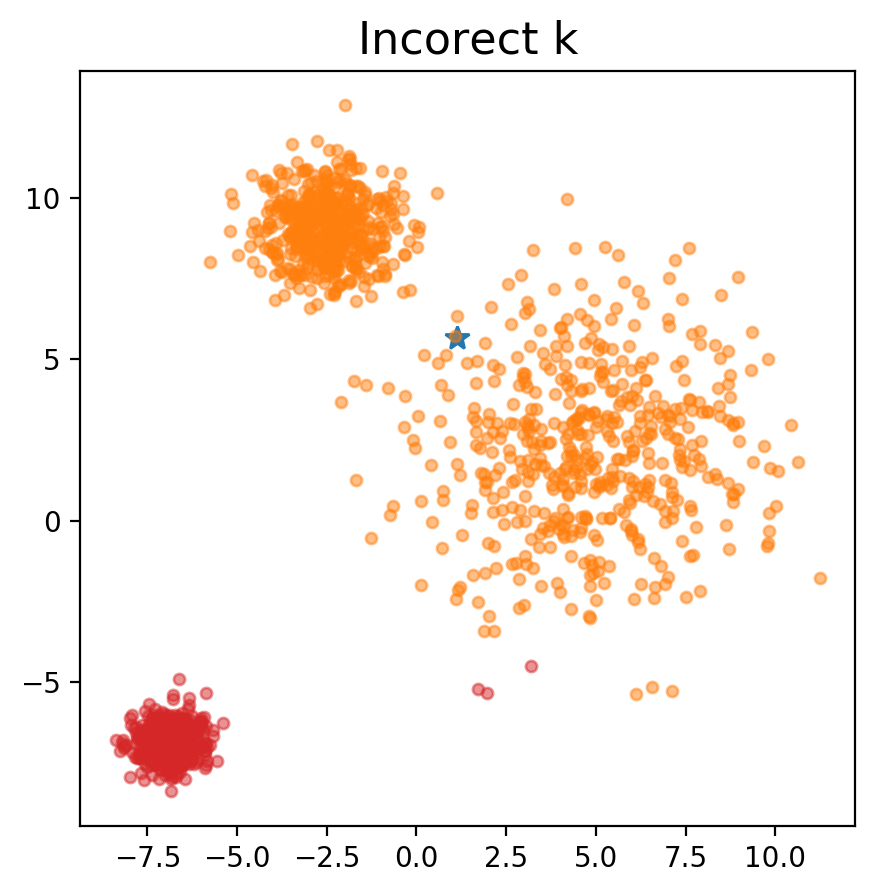

In [82]:
display(Image("inc_k.png", width = 400))

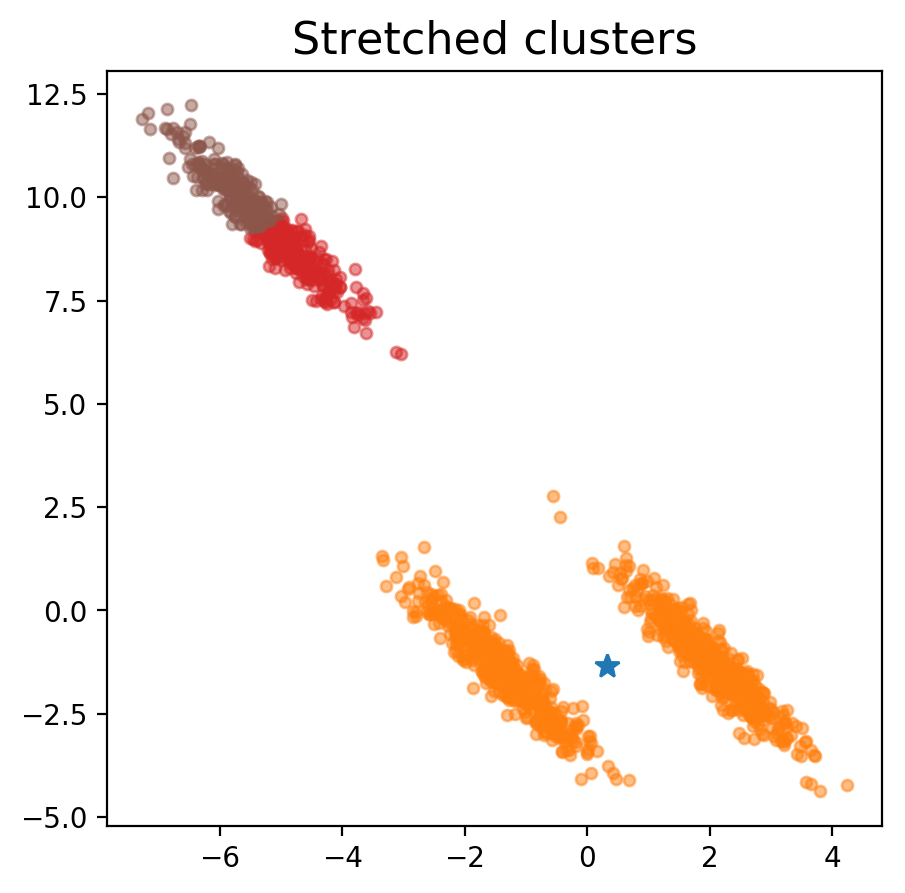

In [83]:
display(Image("stretch.png", width = 400))

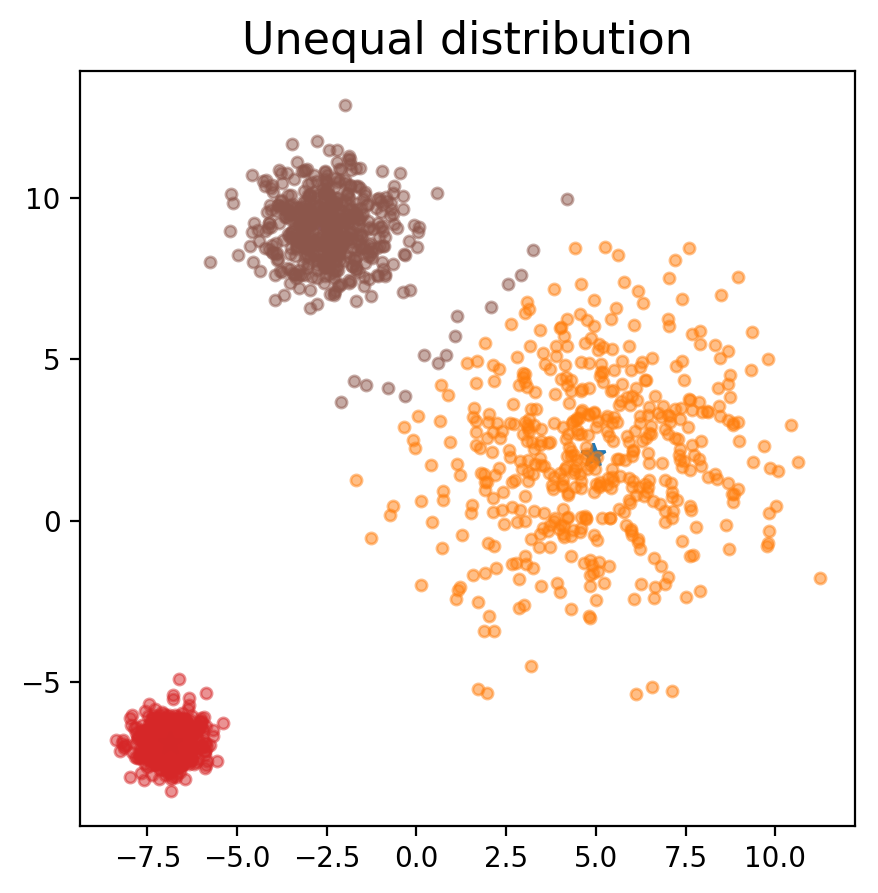

In [84]:
display(Image("uneq.png", width = 400))

## Как улучшить $\texttt{k-means}$, чтобы получить гарантированную сходимость?
Обозначения: $С_{OPT}$ - оптимальный набор кластеров, $\phi_{OPT}$ - соответствующее значение $\phi$. 

В некоторых реализациях $\texttt{k-means}$ $O(c+\epsilon)$-конкурентный (т.е. $\mathbb{E}\phi \le O(c+\epsilon)\phi_{OPT}$), однако в них время работы либо экспоненциально зависят от $k$, либо зависят от $|\mathcal{X}|$ в большой степени, что лишает $\texttt{k-means}$ его основных преимуществ.

Выход: изменим инициализацию. 

$\textbf{Farthest point}$: Можем первый центр выбирать произвольно из $\mathcal{X}$, а последующие выбирать из $\mathcal{X}$ "максимально далеко" от предыдущих. Такая инициализация оказывается очень чуствительна к выбросам.

$\textbf{k-means++}$: Позволяет, сохраняя простоту и быстроту алгоритма, обеспечить гарантию сходимости $\phi$. 

$\textbf{Теорема}$. При применении алгоритма k-means++ выполняется соотношение:
$$\mathbb{E}\phi \le 8(\ln k + 2)\phi_{OPT}$$

## Алгоритм $\texttt{k-means++}$
За $D(x)$ обозначим расстояние от объекта $x$ до ближайшего выбранного центра. $D(x) = \min\limits_{c \in \mathcal{C}}||x-c||^2$.

+ 1a. Произвольно выбираем центр $c_1$ из множества объектов. $i$ = 2.

+ 1b. Выбираем $с_i$ из $\mathcal{X}$ с вероятностью $\mathbb{P}(x) = \dfrac{D(x)^2}{\sum\limits_{x \in \mathcal{X}}D(x)^2}$. $i$++

+ 1c. Повторяем 1b, пока не выберем все $k$ центров.

+ Выполняем шаги 2-4 алгоритма $\texttt{k-means}$.

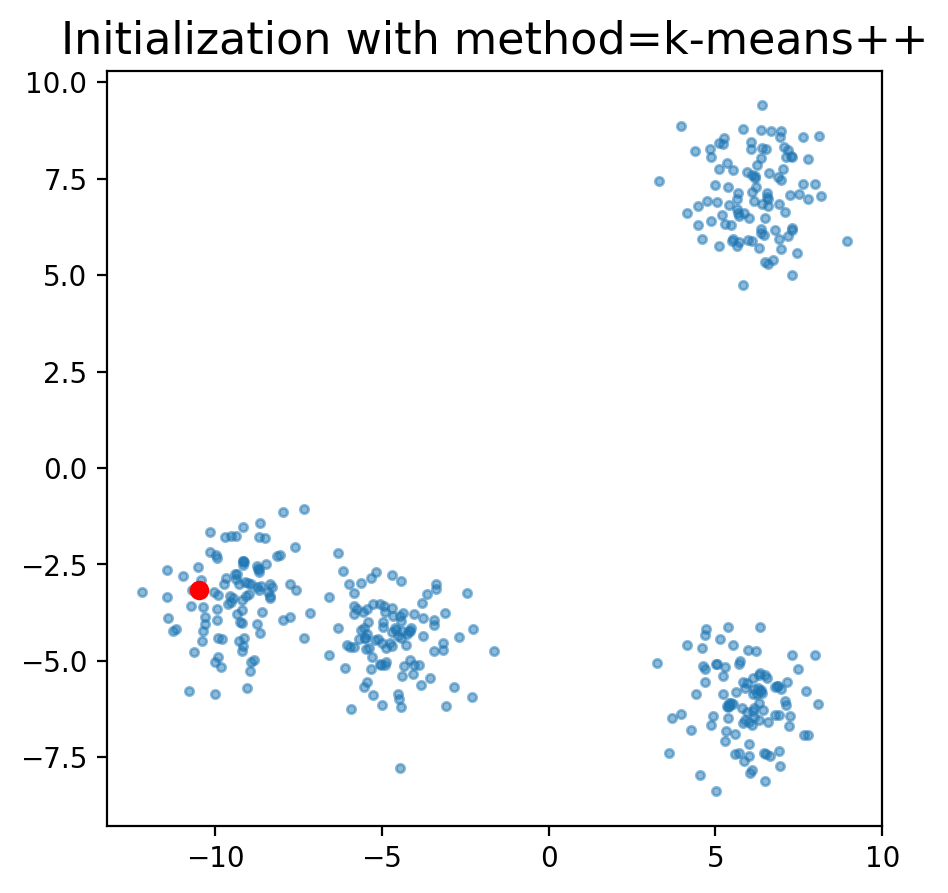

In [85]:
display(Image("init_0.png", width = 400))

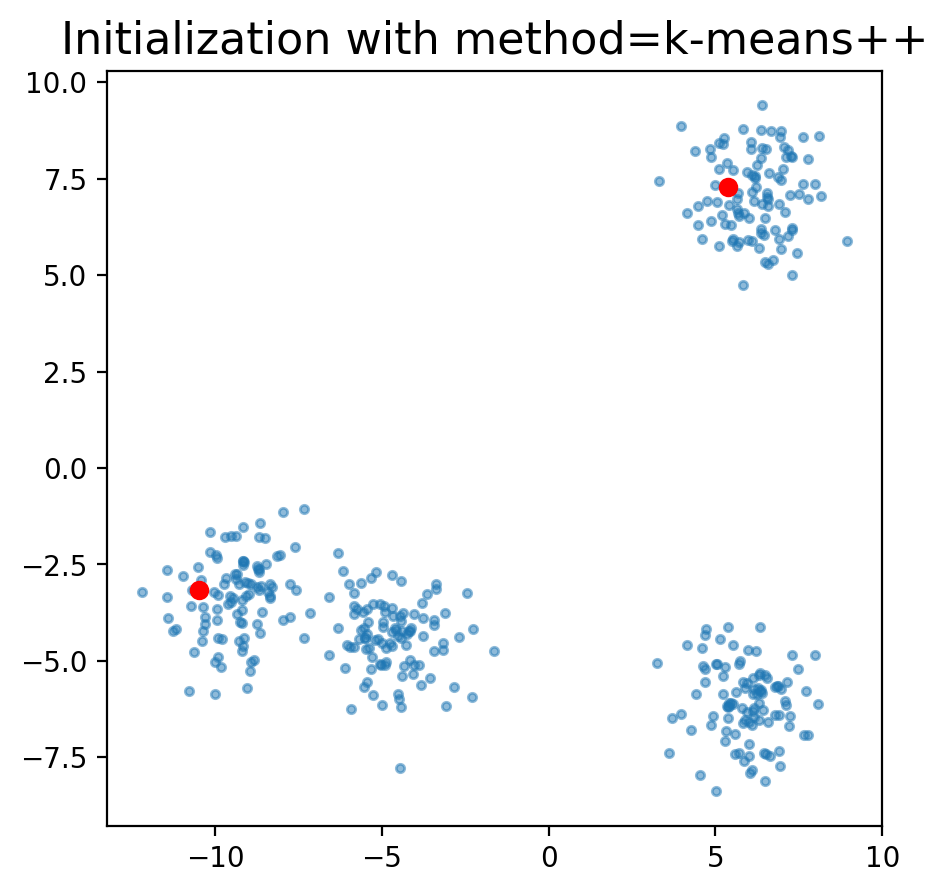

In [86]:
display(Image("init_1.png", width = 400))

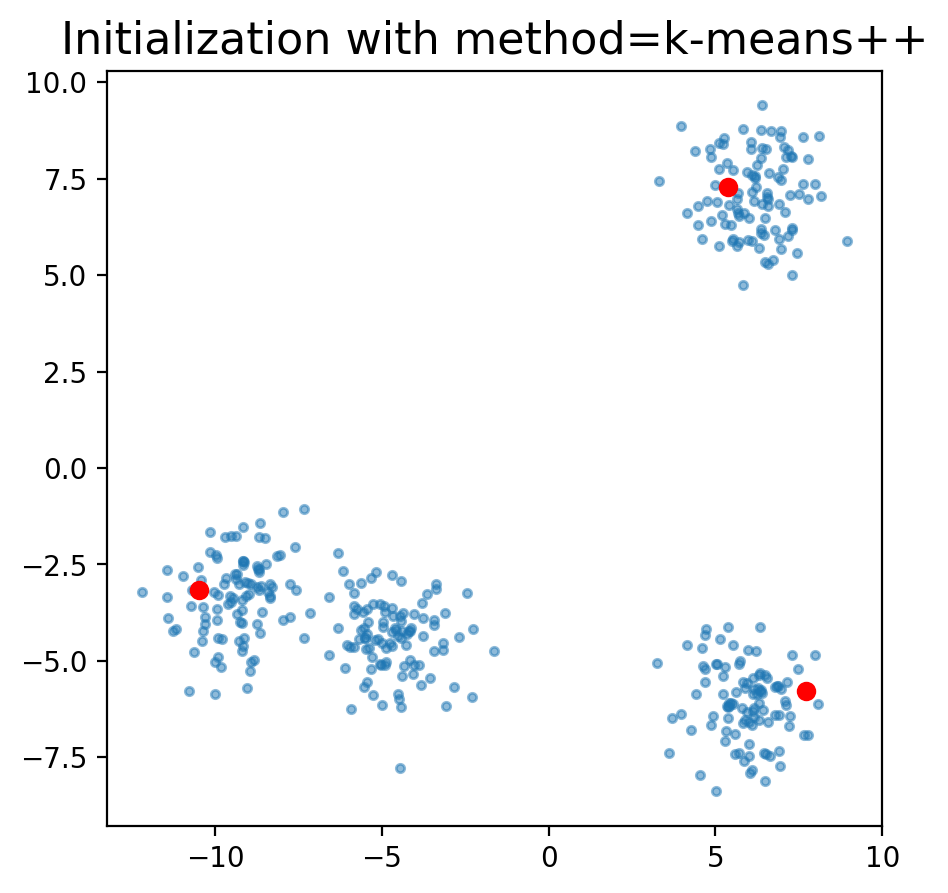

In [87]:
display(Image("init_2.png", width = 400))

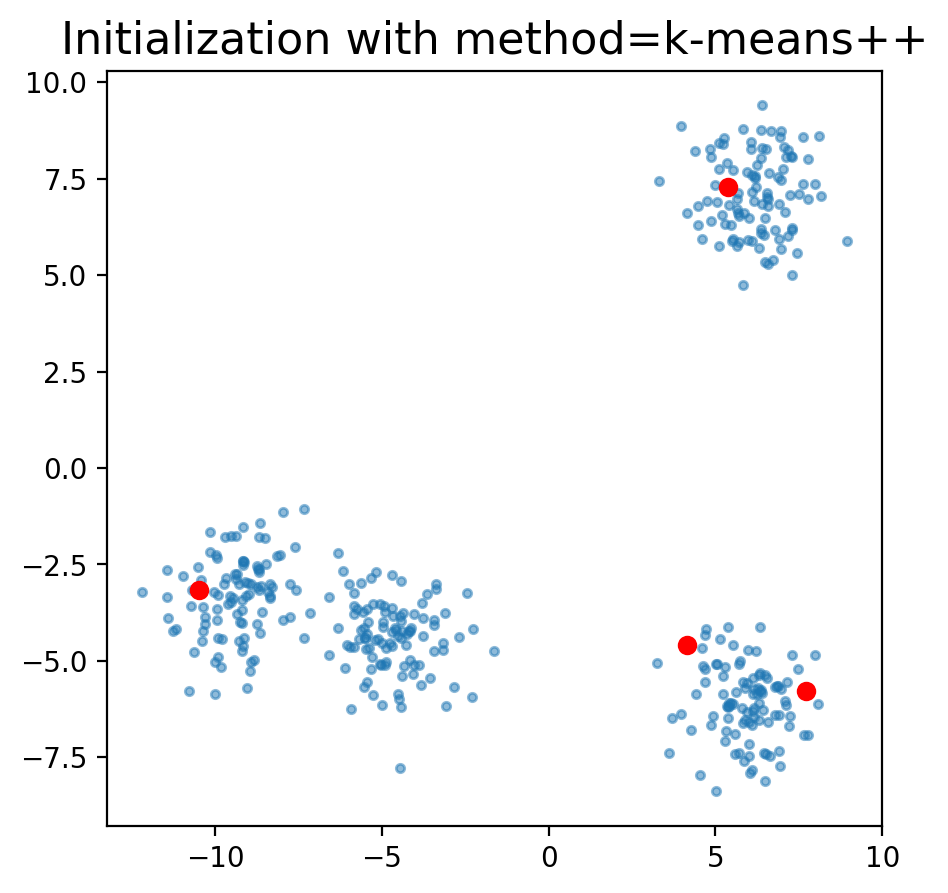

In [88]:
display(Image("init_3.png", width = 400))

### Недостатки $\texttt{k-means++}$
+ Всё ещё необходимо знать заранее число кластеров. 
 + Решение: $\textbf{Bisect Means}$ сначала выполняет 2-means, затем дробит кластеры на 2, пока не достигнем приемлемой $\phi$.
+ Требует $k$ проходов по данным. Часто, если данные массивные, то число кластеров тоже большое.
     + Простое решение: $\textbf{MiniBatchKMeans}$ позволяет работать с большим объёмом данных, предполагая, что рандомный sample данных имеет схожее со всем массивом распределение.
     +  $\textbf{k-means ||}$   [Bahmani 2012]

## $\texttt{K-means++}$ $O(\log k)$-приближает оптимум
Перейдём, наконец, к доказательству основоной теоремы.  $\mathbb{E}\phi\le8(\ln k+2)\phi_{OPT}$

$\textbf{Лемма 1}$. Если $S$ - точки с центром масс $c(S)$, а $z$ - произвольная точка, то 
$$\sum\limits_{x\in\mathcal{X}}||x-z||^2 - \sum\limits_{x\in\mathcal{X}}||x-c(S)||^2 = |S| ~||c(S)-z||^2$$

$Proof.$ Для евклидовой нормы левую часть можно записать так:
$$|S|(z^2-c(S)^2)+(2c(S)-2z)|S|c(S) = |S|(z^2+c(S)^2-2zc(S))$$ 

Это показывает, что $\texttt{k-means}$ действительно минимизирует $\phi$.

## Выбираем первый центр
Чему равна ошибка при выборе первого центра кластера?

Пусть $\mathcal{C}$ - множество центров (кластеринг), $\phi$ - соответствующая стоимость, $\mathcal{A}\subset \mathcal{X}$. Тогда  обозначим $\phi(\mathcal{A}) = \sum\limits_{a\in \mathcal{A}}\min\limits_{c\in \mathcal{C}}||a-c||^2$.

$\textbf{Лемма 2}$. Пусть $\mathcal{A}$ - произвольный кластер из $C_{OPT}$, и пусть $\mathcal{C}$ - кластеринг, состоящий всего из одного центра, который выбирается произвольно из $\mathcal{A}$. Тогда $\mathbb{E}\phi(\mathcal{A}) = 2\phi_{OPT}(\mathcal{A}).$

$Proof.$ $c(\mathcal{A})$ - центр масс $\mathcal{A}$. Из Леммы 1 следует, что $c(\mathcal{A}) \in C_{OPT}$. По ней же:
$$\mathbb{E}\phi(\mathcal{A}) = \sum\limits_{c_0 \in \mathcal{A}}\mathbb{P}(c_0)\sum\limits_{a\in \mathcal{A}}||a-c_0||^2=\frac{1}{|\mathcal{A}|}\sum\limits_{c_0 \in \mathcal{A}}\sum\limits_{a\in \mathcal{A}}||a-c_0||^2=$$
$$=\frac{1}{|\mathcal{A}|}\sum\limits_{c_0 \in \mathcal{A}}\sum\limits_{a\in \mathcal{A}}(||a-c(\mathcal{A})||^2+|A|~||c(\mathcal{A})-c_0||^2) = 2\sum\limits_{a\in \mathcal{A}}||a-c( \mathcal{A})||^2$$.

## Теперь продолжим анализ для выбора остальных  центров

$\textbf{Лемма 3}$. Пусть $\mathcal{A}$ - произвольный кластер из $C_{OPT}$, и пусть $\mathcal{C}$ - произвольный кластеринг. Тогда при добавлении в $\mathcal{C}$ нового центра из $\mathcal{A}$ c весом $D(x)^2$ получим $\mathbb{E}\phi(\mathcal{A}) \le 8\phi_{OPT}(\mathcal{A})$.

$Proof.$ $\mathbb{E}\phi(\mathcal{A}) = \sum\limits_{c_0 \in \mathcal{A}}\dfrac{D(c_0)^2}{\sum\limits_{a \in \mathcal{A}}D(a)^2}\sum\limits_{a \in \mathcal{A}}\min(D(a)^2,||a-c_0||^2)$ 

 $$\forall a,a_0\rightarrow D(a_0) \le D(a) + ||a-a_0||$$

Неравенство Коши-Шварца: 

$(D(a)\cdot1+||a+a_0||\cdot1)^2 \le (D(a)^2+||a+a_0||^2)(1^2+1^2) = 2(D(a)^2+||a+a_0||^2)$. 
$$D(a_0)^2 \le 2D(a)^2+2||a-a_0||^2$$

$$D(a_0)^2 \le \frac{2}{|\mathcal{A}|}(\sum\limits_{a\in\mathcal{A}}D(a)^2+\sum\limits_{a\in\mathcal{A}}||a-a_0||^2) $$

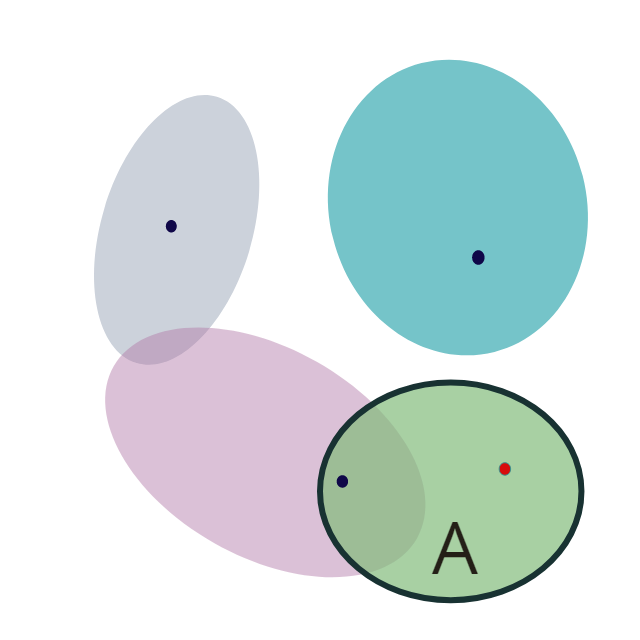

In [18]:
display(Image("lemm3.png", width = 500))

Подставляем:

$$\mathbb{E}\phi(\mathcal{A}) \le \frac{2}{|\mathcal{A}|}\sum\limits_{c_0 \in \mathcal{A}}\dfrac{\sum\limits_{a\in\mathcal{A}}D(a)^2}{\sum\limits_{a\in\mathcal{A}}D(a)^2}\sum\limits_{a \in \mathcal{A}}\min(D(a)^2,||a-c_0||^2)+\frac{2}{|\mathcal{A}|}\sum\limits_{c_0 \in \mathcal{A}}\dfrac{\sum\limits_{a\in\mathcal{A}}||a-c_0||^2}{\sum\limits_{a\in\mathcal{A}}D(a)^2}\sum\limits_{a \in \mathcal{A}}\min(D(a)^2,||a-c_0||^2) \le \\\le\frac{4}{|\mathcal{A}|}\sum\limits_{c_0\in\mathcal{A}}\sum\limits_{a\in\mathcal{A}}||a-c_0||^2$$

Теперь применим предыдущую лемму:

$$\frac{4}{|\mathcal{A}|}\sum\limits_{c_0\in\mathcal{A}}\sum\limits_{a\in\mathcal{A}}||a-c_0||^2 = 4\mathbb{E}\phi_0(\mathcal{A}) = 8\phi_{OPT}$$

$\textbf{Лемма 4}.$ Пусть $\mathcal{C}$ - произвольный кластеринг. Выберем $u>0$ "непокрытых" кластеров из $C_{OPT}$, обозначим $\mathcal{X}_u$ - множество точек, из этих кластеров. $\mathcal{X}_c = \mathcal{X} - \mathcal{X}_u$. Положим мы добавляем $t\le u$ произвольных центров в $\mathcal{C}$, выбранных с весом $D^2$. $\mathcal{C'}$ - итоговый кластеринг. Тогда
$$\mathbb{E}\phi' \le (\phi(\mathcal{X_c})+8\phi_{OPT}(\mathcal{X_u}))(1+H_t) + \frac{u-t}{u}\phi(\mathcal{X_u})$$
где $H_t=\frac{1}{1}+\dots+\frac{1}{t}$ - гармоническая сумма.

$Proof.$ Докажем по индукции, будем делать переход от $(t-1,u-1)$ и  $(t-1,u)$ к $(t,u)$.


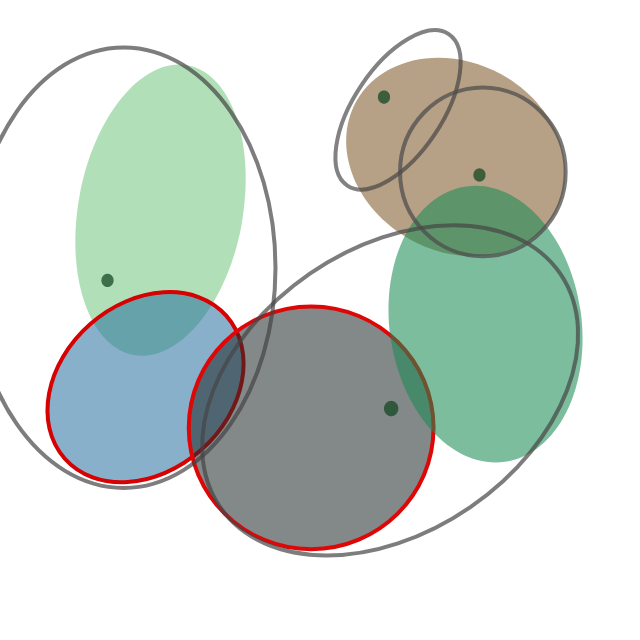

In [19]:
display(Image("lemm4.1.png", width = 500))

+ База: 
    + $t=0,u>0\Rightarrow H_t+1 = 1 = \frac{u-t}{u}$ 
    + $t=1,u=1:~ \mathbb{E}\phi' \le \frac{\phi(\mathcal{X_u})}{\phi}(\phi(\mathcal{X_c})+8\phi_{OPT}(\mathcal{X_u}))+\frac{\phi(\mathcal{X_c})}{\phi}\phi, т.к.~\frac{\phi(\mathcal{X_u})}{\phi}=\sum\limits_{x_u\in \mathcal{X_u}}\dfrac{D(x_u)^2}{\sum\limits_{x \in \mathcal{X}}D(x)^2}$
    
    Действитеьно, $\frac{\phi(\mathcal{X_u})}{\phi}=\sum\limits_{x_u\in \mathcal{X_u}}\dfrac{D(x_u)^2}{\sum\limits_{x \in \mathcal{X}}D(x)^2}$ - вероятность выбрать точку из $\mathcal{X_u}$, и в этом случае $\mathbb{E}\phi' \le (\phi(\mathcal{X_c})+8\phi_{OPT}(\mathcal{X_u}))$ по Лемме 3.
    
    В случае, когда выбираем из $\mathcal{X_c}$, мы получаем стоимость $\phi' \le \phi$.
    
    Тогда $\mathbb{E}\phi' \le 2\phi(\mathcal{X_c})+8\phi_{OPT}(\mathcal{X_u})$, что соответствует условию, т.к. $H_1+1=2$

### Самый тонкий момент
+ Шаг:
    + Если мы добавляем в $\mathcal{X_c}$, выбираем его с вероятностью $\frac{\phi(\mathcal{X_c})}{\phi}$. На следующем шаге будет конфигурация $(t-1,u)$. Тогда вклад в $\mathbb{E}\phi'$ не больше
    $$\frac{\phi\left(\mathcal{X_c}\right)} {\phi}\cdot \\ \cdot\left(\left(\phi\left(\mathcal{X_c}\right)+8\phi_{OPT}\left(\mathcal{X_u}\right)\right)\left(1+H_{t-1}\right) + \frac{u-t+1}{u}\phi\left(\mathcal{X_u}\right)\right)$$

 + Если добавляем в кластер $\mathcal{A} \subset \mathcal{X_u}$,  делаем это с вероятностью $\frac{\phi(\mathcal{A})}{\phi}$. Условную вероятность выбрать $a \in \mathcal{A}$ обозначим $p_a$. $\phi_a$ - стоимость $\phi(\mathcal{A})$ после добавления $a$. Cледующая конфигурация $(t-1,u-1)$, причём множество точек из непокрытых кластеров станет $\mathcal{X_u} - \mathcal{A}$, из покрытых - $\mathcal{X_c} + \mathcal{A}$. Тогда вклад в $\mathbb{E}\phi'$ не более
    $$\frac{\phi\left(\mathcal{A}\right)}{\phi}\cdot \\ \cdot\sum\limits_{a \in \mathcal{A}}p_a\left(\left(\phi\left(\mathcal{X_c} + \mathcal{A}\right)+8\phi_{OPT}\left(\mathcal{X_u}- \mathcal{A}\right)\right)\left(1+H_{t-1}\right) + \frac{u-t}{u-1}\phi\left(\mathcal{X_u- \mathcal{A}}\right)\right)\\
    =\frac{\phi(\mathcal{A})}{\phi}\cdot \\ \cdot\sum\limits_{a \in \mathcal{A}}p_a\left(\left(\phi(\mathcal{X_c}) + \phi_a+8\phi_{OPT}(\mathcal{X_u})- 8\phi_{OPT}(\mathcal{A})\right)(1+H_{t-1}) + \frac{u-t}{u-1}(\phi(\mathcal{X_u})- \phi\left(\mathcal{A})\right)\right)$$

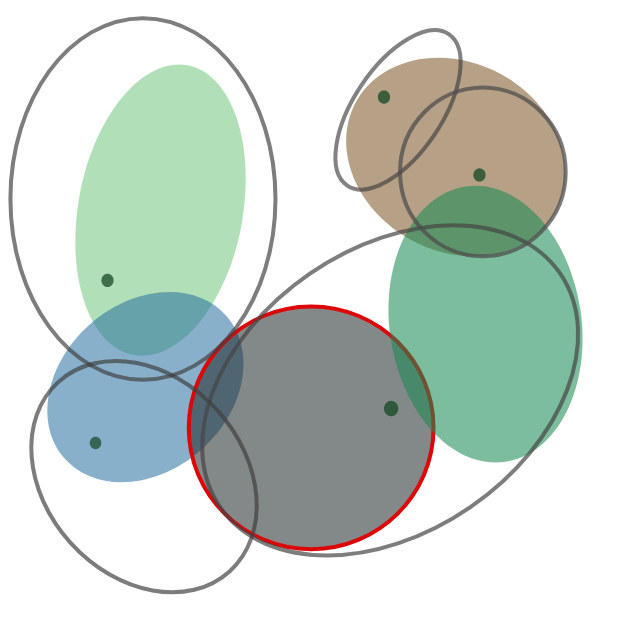

In [20]:
display(Image("lemm4.2.png", width = 500))

Суммируем с вкладом первого случая:
$$\mathbb{E}\phi' \le \left(\phi(\mathcal{X_c})+8\phi_{OPT}(\mathcal{X_u})\right)(1+H_{t-1}) + \frac{\phi(\mathcal{X_u})}{u}(u-t)+\frac{\phi(X_c)\phi(X_u)}{\phi u}\le$$
$$\le \left(\phi(\mathcal{X_c})+8\phi_{OPT}(\mathcal{X_u})\right)(1+H_{t-1}+\frac{1}{u}) + \frac{\phi(\mathcal{X_u})}{u}(u-t)$$

Заметим, что $\frac{1}{u} \le \frac{1}{t}$, на чём и завершается идуктивный шаг.

$\textbf{Доказательство теоремы}$: Применим лемму для кластеринга $C$, полученного после первого шага $\texttt{k-means++}$, в качестве единственного покрытого кластера $\mathcal{A}$ возьмём кластер из $C_{OPT}$, в который попадает центр, выбранный самым первым. $t=u=k-1$. Тогда $$\mathbb{E}\phi \le (\phi(\mathcal{A})+8\phi_{OPT}-8\phi_{OPT}(\mathcal{A}))(2+\ln k) \le 8(\ln k + 2)\phi_{OPT}$$

# Эксперемент

In [21]:
%matplotlib inline
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import warnings
import sklearn
from sklearn.datasets.samples_generator import make_blobs
import random
from matplotlib import pyplot as plt
from collections import defaultdict
import matplotlib.cm as cm
import time

## Реализация k-means++

In [67]:
class My_KMeans():
    def __init__(self, k = 5, method = 'random', n_init = 10, max_iter = 300, random_state = None):
        self.k = k                         #number of clusters 
        self.random_state = random_state   #for make_blobs(...) to make reproducible sample
        self.n = None                       #number of samples
        self.X = None                       #data
        self.centers = []               #coordinates of centroids
        self.clusters = None 
        self.method = method                #method of initializing - should be 'k-means++' or 'random'
        self.D2 = None                      #squared distances to closest centers for every sample
        self.n_init = n_init
        self.max_iter = max_iter
        
    def init_data(self, n):
        self.n = n
        if self.random_state != None :
            X, y = make_blobs(n_samples=n, centers=self.k, n_features=2, random_state = self.random_state)
        else:
            X, y = make_blobs(n_samples=n, centers=self.k, n_features=2)  
        self.X = X
    
    def init_centers(self):
        self.phi = 0
        self.pl = []
        for i in range(self.n_init) :
            centers_prev = self.centers
            phi_prev = self.phi
            if self.method != 'k-means++':
                #step 1. K-means
                self.centers = random.sample(list(self.X), self.k)
                self.comp_D2()
            else:
                 #step 1. K-means++
                self.centers = random.sample(list(self.X), 1)
                for _ in range(1,self.k):
                    self.comp_D2()
                    self.centers.append(self.choose_next_center())
            self.phi = sum(self.D2)
            if self.phi > phi_prev and i != 0 :
                self.centers = centers_prev
                self.phi = phi_prev
            self.pl.append(self.phi)
                
    def comp_D2(self):
        centers = self.centers
        X = self.X
        D2 = np.array([min([np.linalg.norm(x - c, ord = 2)**2 for c in centers]) for x in X])
        self.D2 = D2
            
    def choose_next_center(self):
        D2 = self.D2
        probabs = D2 / D2.sum()
        cumprobabs = probabs.cumsum()  # np.max(cumprobabs) = 1
        rand = random.random()  
        ind = np.where(cumprobabs >= rand)[0][0]  # Probability of choosing x is proportional to D2
        
        return(self.X[ind])
 
    def break_on_clusters(self):
        clusters = defaultdict(list)
        centers = self.centers
        X = self.X
        for x in X:
            closest_center_ind = min([(i, np.linalg.norm(x - c, ord = 2))
                                     for i, c in enumerate(centers)], key=lambda t:t[1])[0]
            clusters[closest_center_ind].append(x)
            
        self.clusters = clusters
 
    def renew_centers(self):
        centers = []
        keys = sorted(self.clusters.keys())
        clusters = self.clusters
        for i in keys:
            centers.append(np.mean(clusters[i], axis = 0))
        self.centers = centers
 
    def is_converged(self):
        k = len(self.prev_centers)
        return(set([tuple(a) for a in self.centers]) == set([tuple(a) for a in self.prev_centers])\
               and len(set([tuple(a) for a in self.centers])) == k)
    
    def fit(self, X = []):
        if len(X) > 0 :
            self.X = X
        if len(self.X) == 0 :
            self.init_data(self.n)
        
        self.find_centers()

    def find_centers(self):
        X = self.X
        k = self.k
        self.init_centers()
        self.prev_centers = []
        self.conv = []
        it = 0
        while not self.is_converged() and it < self.max_iter:
            self.prev_centers = self.centers
            # Assign points to propriate clusters
            self.break_on_clusters()
            # Renew centers
            self.renew_centers()
            it+=1

        self.labels = []
        self.phi = 0
        self.F = 0
        # Compute answers (phi, F, labels)
        for x in X:
            closest_center_ind, D = min([(i, np.linalg.norm(x - c, ord = 2))
                                     for i, c in enumerate(self.centers)], key=lambda t:t[1])
            self.labels.append(closest_center_ind)
            self.phi += D**2
            self.F += D**2 / len(self.clusters[closest_center_ind])
        self.labels_ = self.labels
        self.inertia_ = self.phi
                
    def plot_init_centers(self):
        X = self.X
        fig = plt.figure(figsize=(5,5))
        plt.plot(list(zip(*X))[0], list(zip(*X))[1], '.', alpha=0.5)
        plt.plot(list(zip(*self.centers))[0], list(zip(*self.centers))[1], 'ro')
        plt.title('Initialization with method=%s'% self.method, fontsize = 16)
        plt.savefig('kmeans_init_N%s_K%s.png' % (str(self.n),str(self.k)), \
                    bbox_inches='tight', dpi=200)
    def plot(self):
        X = self.X
        fig = plt.figure(figsize=(5,5))

        if self.centers and self.clusters:
            centers = self.centers
            clusters = self.clusters
            k = self.k
            for i, clu in clusters.items():
                plt.plot(centers[i][0], centers[i][1], 'o', marker='*', 
                         markersize=9)
                plt.plot(list(zip(*clusters[i]))[0], list(zip(*clusters[i]))[1], '.', 
                         markersize=8, alpha=0.5)
        else:
            plt.plot(list(zip(*X))[0], list(zip(*X))[1], '.', alpha=0.5)
        if self.method == '++':
            tit = 'K-means++'
        else:
            tit = 'K-means'
        pars = 'n=%s, k=%s' % (str(self.n), str(self.k))
        plt.title('\n'.join([pars, tit]), fontsize=16)
        plt.savefig('kpp_n%s_k%s.png' % (str(self.n), str(self.k)), 
                    bbox_inches='tight', dpi=200)

### Оценки качества кластеризации
+ $\phi = \sum\limits_{x \in \mathcal{X}}\min\limits_{c\in \mathcal{C}}||x-c||^2 \rightarrow \min$
+ $\Phi_0 = \sum\limits_{y \in Y}\frac{1}{|K_y|}\sum\limits_{i:y_i=y}\rho(x_i,c_y)\rightarrow \min$

In [23]:
r = random.randint(0,1000)
kmpp = My_KMeans(15, method = 'k-means++', random_state = r)
kmpp.init_data(1000)
km = My_KMeans(15, random_state = r)
km.init_data(1000)

## Пример работы:
### K-means++

k-means++, phi:
 1594
k-means++, F:
23


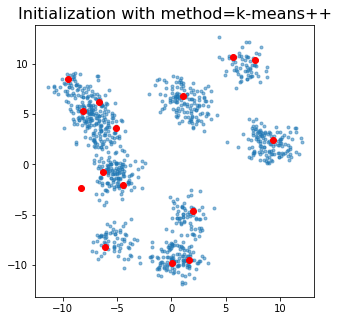

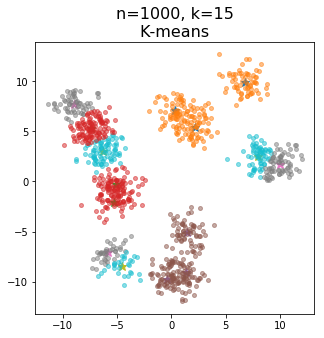

In [26]:
kmpp.init_centers()
kmpp.plot_init_centers()
kmpp.find_centers()
kmpp.plot()
print ('k-means++, phi:\n %d\nk-means++, F:\n%d' %(kmpp.phi, kmpp.F))

### K-means

k-means, phi:
2493
k-means, F:
25


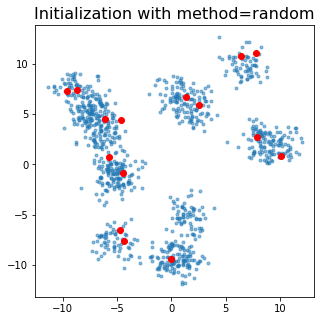

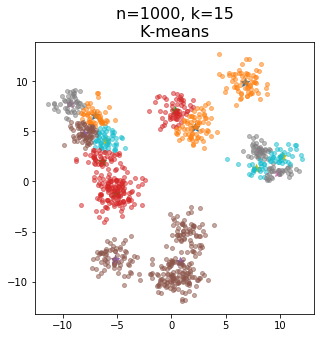

In [28]:
km.init_centers()
km.plot_init_centers()
km.find_centers()
km.plot()
print ('k-means, phi:\n%d\nk-means, F:\n%d' %(km.phi, km.F))

## Зависимость $\phi$ после первого шага от номера попытки выполнить первый шаг

Result phi:	543


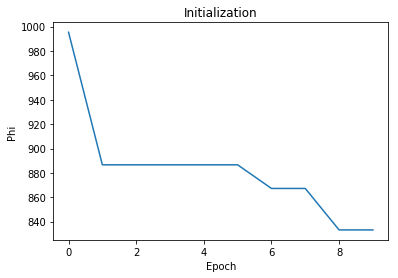

In [74]:
kmpp = My_KMeans (k = 30, method = 'k-means++', n_init = 10)
kmpp.init_data(500)
kmpp.find_centers()
phi = kmpp.pl
plt.plot(list(range(10)), phi)
plt.title ('Initialization')
plt.xlabel ('Epoch')
plt.ylabel ('Phi')
print('Result phi:\t%d'%kmpp.phi)

In [30]:
from sklearn.cluster import KMeans

<Figure size 864x864 with 0 Axes>

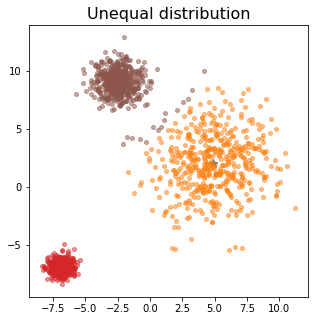

In [49]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
kmpp = My_KMeans(k=2, method='k-means++', random_state=random_state)
kmpp.fit(X)
kmpp.plot()

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
kmpp = My_KMeans(k=3, method='k-means++', random_state=random_state)
kmpp.fit(X_aniso)
kmpp.plot()

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
kmpp.fit(X_varied)
kmpp.plot()

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))

kmpp.fit(X_filtered)
kmpp.plot()

## Сравнение качества встроенных и реализованных алгоритмов

In [44]:
phi,t  = [[0]*2 for i in range(2)]
n_iter = 500
k = 10
n = 100
for i in range (n_iter):
    X, y = make_blobs(n_samples=n, centers = k, n_features=2)
    
    km_inh = KMeans(10, n_init = 1)
    km_inh.fit(X)
    phi[0] += km_inh.inertia_
    
    km_inh = KMeans(10, n_init = 1, init = 'random')
    km_inh.fit(X)
    phi[1] += km_inh.inertia_   

In [45]:
print ('Comparison of sclearn implementations of k-means and k-means++')
print ('Over %d samples with %d points and %d clusters:\n' %  (n_iter, n, k))
print ('Mean phi:\n\t K-means: %lg \n\t K-means++: %lg '% (phi[1]/n_iter, phi[0]/n_iter))

Comparison of sclearn implementations of k-means and k-means++
Over 500 samples with 100 points and 10 clusters:

Mean phi:
	 K-means: 238.989 
	 K-means++: 164.799 


In [42]:
phi, F = [[0]*2 for i in range(2)]
n_iter = 500
n = 100
k = 10
for i in range (n_iter):
    r = random.randint(0,1000)
    
    kmpp = My_KMeans(k, random_state = r, method = 'k-means++', n_init = 1)
    kmpp.init_data(n)
    kmpp.find_centers()
    phi[0] += kmpp.phi
    F[0] += kmpp.F
    
    km = My_KMeans(k, random_state = r , n_init = 1)
    km.init_data(n)
    km.find_centers()
    phi[1] += km.phi
    F[1] += km.F

In [43]:
print ('Comparison of my implementations of k-means and k-means++')
print ('Over %d samples with %d points and %d clusters:\n' %  (n_iter, n, k))
print ('Mean phi:\n\t K-means: %lg \n\t K-means++: %lg'% (phi[1]/n_iter, phi[0]/n_iter))
print ('Mean F:\n\t K-means: %lg \n\t K-means++: %lg' % (F[1]/n_iter, F[0]/n_iter))

Comparison of my implementations of k-means and k-means++
Over 500 samples with 100 points and 10 clusters:

Mean phi:
	 K-means: 243.807 
	 K-means++: 186.158
Mean F:
	 K-means: 18.1443 
	 K-means++: 16.1533


## Пример кластеризации датасета "Ирисы Фишера"

Clusterization of sample from Fisher's irises dataset


/home/evgenii/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


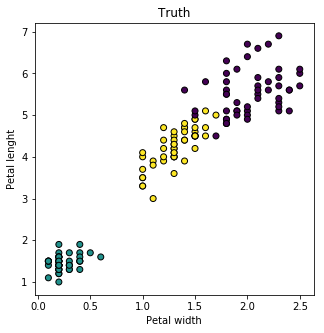

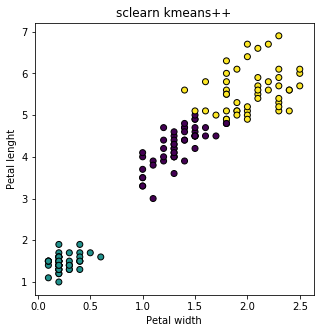

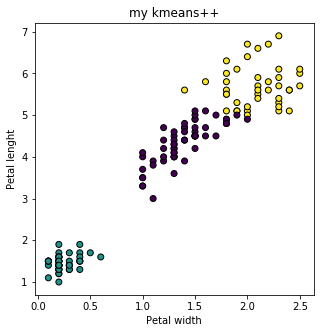

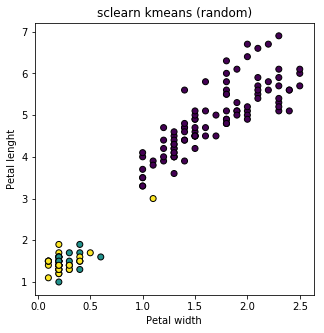

In [283]:
from sklearn import datasets

np.random.seed(5)
iris = datasets.load_iris()
X = iris.data[:,1:]
y = iris.target

print ('Clusterization of sample from Fisher\'s irises dataset')
estimators = [('k_means_iris_3', KMeans(n_clusters=3, n_init=1)),
              ('k_means_iris_3', My_KMeans(3, method = 'k-means++')),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fig = plt.figure(0, figsize=(5, 5),  edgecolor='k')
y = np.choose(y, [1, 2, 0]).astype(np.float)
plt.scatter(X[:, 2], X[:, 1], c=y, edgecolor='k')
plt.xlabel ('Petal width')
plt.ylabel ('Petal lenght')
plt.title('Truth')

fignum = 1
titles = ['sclearn kmeans++', 'my kmeans++', 'sclearn kmeans (random)']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(5, 5))
    est.fit(X)
    labels = est.labels_
    plt.scatter(X[:, 2], X[:, 1],
               c=labels, edgecolor='k')
    plt.xlabel ('Petal width')
    plt.ylabel ('Petal lenght')

    plt.title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

fig.show()

## Зависимость качества алгоритмов от количества итераций инициализации

Evaluation of KMeans with k-means++ init
Evaluation of My_KMeans with k-means++ init
Evaluation of KMeans with random init
Evaluation of My_KMeans with random init
Evaluation of MiniBatchKMeans with k-means++ init
Evaluation of MiniBatchKMeans with random init


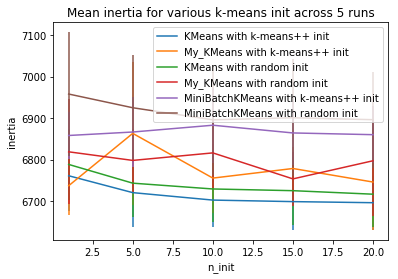

In [285]:
from sklearn.utils import shuffle
from sklearn.utils import check_random_state
from sklearn.cluster import MiniBatchKMeans

random_state = np.random.RandomState(0)
n_runs = 5
n_init_range = np.array([1, 5, 10, 15, 20])
n_samples_per_center = 100

fig = plt.figure()
plots = []
legends = []

cases = [
    (KMeans, 'k-means++', {}),
    (My_KMeans, 'k-means++', {}),
    (KMeans, 'random', {}),
    (My_KMeans, 'random', {}),
    (MiniBatchKMeans, 'k-means++', {'max_no_improvement': 3}),
    (MiniBatchKMeans, 'random', {'max_no_improvement': 3, 'init_size': 500}),
]

for factory, init, params in cases:
    print("Evaluation of %s with %s init" % (factory.__name__, init))
    inertia = np.empty((len(n_init_range), n_runs))

    for run_id in range(n_runs):
        X, y = make_blobs(900, 9, random_state = run_id)
        for i, n_init in enumerate(n_init_range):
            km = factory(n_clusters, init, random_state=run_id,
                         n_init=n_init)
            km.fit(X)
            inertia[i, run_id] = km.inertia_
    p = plt.errorbar(n_init_range, inertia.mean(axis=1), inertia.std(axis=1))
    plots.append(p[0])
    legends.append("%s with %s init" % (factory.__name__, init))

plt.xlabel('n_init')
plt.ylabel('inertia')
plt.legend(plots, legends)
plt.title("Mean inertia for various k-means init across %d runs" % n_runs)
plt.show()